# Data description
Each observation is a 30m x 30m patch
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [2]:
# Read in data
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
train_df = pandas.read_csv('./data/train.csv')
test_df = pandas.read_csv('./data/test.csv')



print("Shape is:", train_df.shape)
print("Columns are:", train_df.columns)

train_df.head()

Shape is: (15120, 56)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', '

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
#Shuffle the data
# train_df = train_df.sample(frac=1).reset_index(drop=True) 
# test_df = test_df.sample(frac=1).reset_index(drop=True) 

# # Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_df.shape[0]))
train_df = train_df.iloc[shuffle]

# # Split into train and test.
# train_data, train_labels = X[:350], Y[:350]
# test_data, test_labels = X[350:], Y[350:]

train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
4428,4429,2220,18,12,0,0,828,211,215,140,...,0,0,0,0,0,0,0,0,0,4
12399,12400,2139,119,10,0,0,933,237,232,125,...,0,0,0,0,0,0,0,0,0,4
4647,4648,2292,109,26,192,98,876,253,201,58,...,0,0,0,0,0,0,0,0,0,4
5953,5954,2345,92,13,0,0,459,240,220,109,...,0,0,0,0,0,0,0,0,0,4
2946,2947,1948,347,13,0,0,180,194,218,162,...,0,0,0,0,0,0,0,0,0,3


In [8]:
# Describe the columns
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [9]:
#Check the df for NAs
print("\nNumber of NA values:")
print(train_df.isnull().sum(axis = 0))


Number of NA values:
Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10       

None of the columns are missing data

In [10]:
# Frequency count of the ID's
print("Head of ID counts:")
print(train_df.Id.value_counts().head())



print("\nNumber of duplicated IDs:")
train_df[train_df.groupby(['Id'])['Elevation'].transform('count') > 1]

Head of ID counts:
2047     1
6758     1
14978    1
8833     1
10880    1
Name: Id, dtype: int64

Number of duplicated IDs:


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


None of the ID's are duplicated

In [11]:
# Describe the soil type columns
train_df.filter(regex=r'^(Soil_Type)').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Soil_Type1,15120.0,0.023479,0.151424,0.0,0.0,0.0,0.0,1.0
Soil_Type2,15120.0,0.041204,0.198768,0.0,0.0,0.0,0.0,1.0
Soil_Type3,15120.0,0.063624,0.244091,0.0,0.0,0.0,0.0,1.0
Soil_Type4,15120.0,0.055754,0.229454,0.0,0.0,0.0,0.0,1.0
Soil_Type5,15120.0,0.010913,0.103896,0.0,0.0,0.0,0.0,1.0
Soil_Type6,15120.0,0.042989,0.202840,0.0,0.0,0.0,0.0,1.0
Soil_Type7,15120.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Soil_Type8,15120.0,0.000066,0.008133,0.0,0.0,0.0,0.0,1.0
Soil_Type9,15120.0,0.000661,0.025710,0.0,0.0,0.0,0.0,1.0
Soil_Type10,15120.0,0.141667,0.348719,0.0,0.0,0.0,0.0,1.0


Soil_Type7 and Soil_Type15 appear to be missing observations where it is non-zero. 

### Hillshade EDA
What is hillshade looking at? Why is it from 0 to 255?

https://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-analyst-toolbox/hillshade.htm

The hillshade raster has an integer value range of 0 to 255. A value of 0 is shaded where a value of 255 is not.

In [12]:
train_df.filter(regex=r'^(Hillshade)').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.0,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.0,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.0,248.0


In [13]:
print("Trees plots in the shadow of other tree plots at 9AM:")
print(train_df.Hillshade_9am.where(train_df.Hillshade_9am==0).value_counts())
print("\nTree plots in the shadow of other tree plots at 12PM:")
print(train_df.Hillshade_Noon.where(train_df.Hillshade_Noon==0).value_counts())
print("\nTrees plots in the shadow of other tree plots at 3PM:")
print(train_df.Hillshade_3pm.where(train_df.Hillshade_3pm==0).value_counts())


Trees in the shadow of other trees at 9AM:
0.0    1
Name: Hillshade_9am, dtype: int64

Trees in the shadow of other trees at 12PM:
Series([], Name: Hillshade_Noon, dtype: int64)

Trees in the shadow of other trees at 3PM:
0.0    88
Name: Hillshade_3pm, dtype: int64


array([[<AxesSubplot:title={'center':'Hillshade_9am'}>],
       [<AxesSubplot:title={'center':'Hillshade_Noon'}>],
       [<AxesSubplot:title={'center':'Hillshade_3pm'}>]], dtype=object)

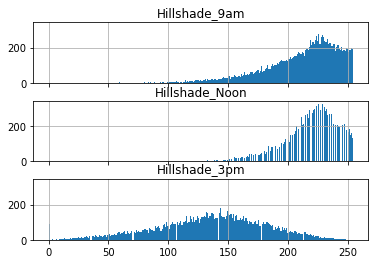

In [14]:

train_df.filter(regex=r'^(Hillshade)').hist(sharex=True, sharey=True, bins = int(255/1), layout = (3,1))



As expected, at noon most of the data is not shaded.
Early in the morning the trees are mostly unshaded and in the early afternoon most of the trees are somewhat shaded.

Note values from 1 to 255 do not indicate whether a tree is in the shadow of another tree. This is what a value of 0 indicates.

## Count of Labels

In [15]:
# check out just the home prices
print(train_df.shape)
print(train_df[['Id', 'Cover_Type']].groupby(['Cover_Type']).agg(['mean', 'count']))
# train_df.Cover_Type.hist(bins=100)

(15120, 56)
                     Id      
                   mean count
Cover_Type                   
1           7996.077778  2160
2           6312.696759  2160
3           8127.537500  2160
4           6354.585648  2160
5           6486.800463  2160
6           8061.305093  2160
7           9584.496759  2160


## Scatter Matrix

<ipython-input-10-9e89101831c4>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


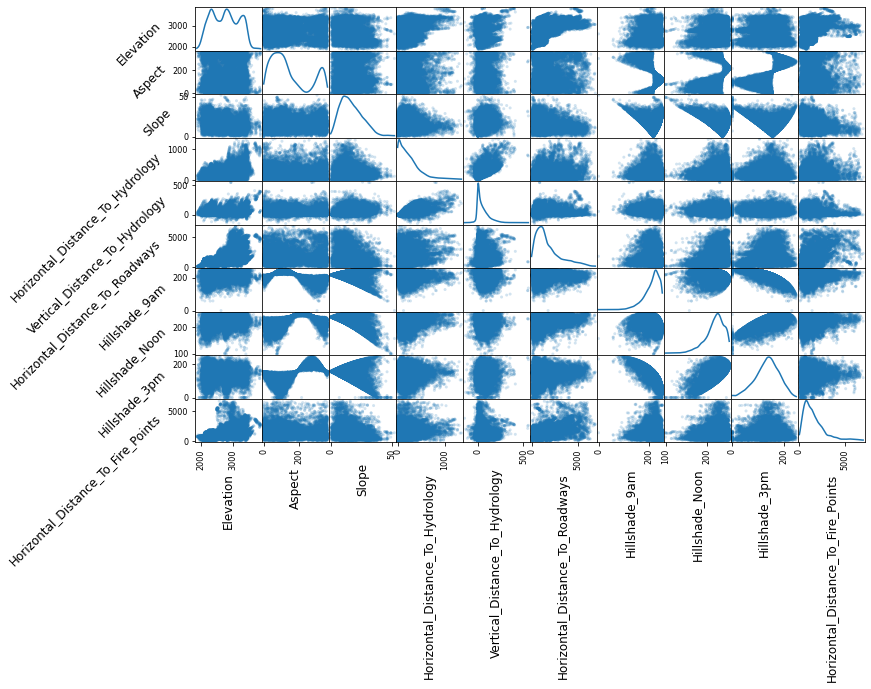

In [10]:
from matplotlib import pyplot as plt

axes = pandas.plotting.scatter_matrix(
    train_df.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Id)').filter(
        regex=r'^(?!Wilderness_Area)'),
    alpha=0.2, 
    figsize=(12, 8), diagonal='kde')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_fontsize(12)
    ax.yaxis.label.set_ha('right')
#     ax.yaxis.label.set_linespacing(2)

# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

For the most part, it looks like there isn't much linear dependency betweeen features with the exception that the Hillshade 9AM and Hillshade 3Pm have some linear dependence. Aspect and hillshade appear to have a somewhat parabollic dependence.

### EDA of Testing Data

In [5]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,565892.0,298066.500000,163359.093603,15121.0,156593.75,298066.5,439539.25,581012.0
Elevation,565892.0,2964.977407,273.157030,1859.0,2818.00,2999.0,3164.00,3858.0
Aspect,565892.0,155.629558,111.962120,0.0,58.00,127.0,260.00,360.0
Slope,565892.0,14.039635,7.450155,0.0,9.00,13.0,18.00,66.0
Horizontal_Distance_To_Hydrology,565892.0,270.556622,212.500153,0.0,108.00,228.0,390.00,1397.0
Vertical_Distance_To_Hydrology,565892.0,46.294408,58.209469,-173.0,7.00,29.0,69.00,601.0
Horizontal_Distance_To_Roadways,565892.0,2367.143116,1561.482002,0.0,1116.00,2018.0,3349.00,7117.0
Hillshade_9am,565892.0,212.131133,26.661063,0.0,198.00,218.0,231.00,254.0
Hillshade_Noon,565892.0,223.435026,19.668053,0.0,213.00,226.0,237.00,254.0
Hillshade_3pm,565892.0,142.726951,38.030094,0.0,119.00,143.0,168.00,254.0


<ipython-input-7-b1a6b78a56e1>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


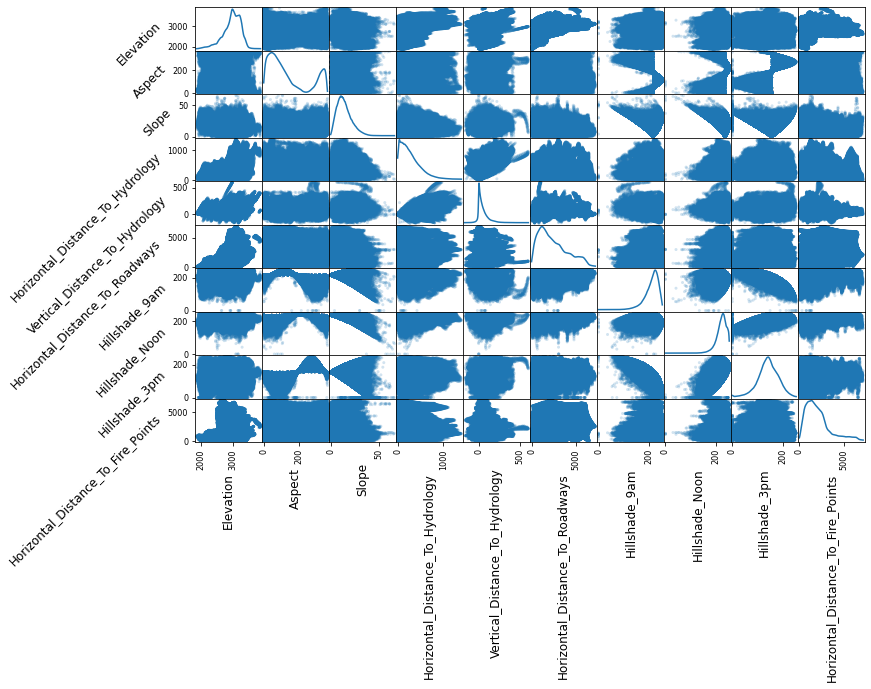

In [7]:
from matplotlib import pyplot as plt

axes = pandas.plotting.scatter_matrix(
    test_df.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Id)').filter(
        regex=r'^(?!Wilderness_Area)'),
    alpha=0.2, 
    figsize=(12, 8), diagonal='kde')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_fontsize(12)
    ax.yaxis.label.set_ha('right')
#     ax.yaxis.label.set_linespacing(2)

# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [8]:
#Check the df for NAs
print("\nNumber of NA values:")
print(test_df.isnull().sum(axis = 0))


Number of NA values:
Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10       